In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 15490 (delta 10), reused 21 (delta 9), pack-reused 15460
Receiving objects: 100% (15490/15490), 14.08 MiB | 20.90 MiB/s, done.
Resolving deltas: 100% (10398/10398), done.


In [3]:
# Configure
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# Compile makefile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [5]:
# Make a copy of yolov3.cfg
# darknet'in cfg dosyalarından birini yine aynı klasör içerisine farklı bir isim ile kopyalıyoruz 
# ardından bu cfg dosyasını kendi eğitim durumumuza göre ayarlıyoruz. Bunun için yolov4 tutorial'ını ziyaret etmenizi öneririm 
!cp /content/darknet/cfg/yolov3.cfg cfg/yolov3_custom.cfg

In [6]:
# copy over both datasets into the root directory, comment out test.zip if you are not using a validation dataset
!cp /content/gdrive/MyDrive/yolov3_tutorial/obj.zip ../
!cp /content/gdrive/MyDrive/yolov3_tutorial/test.zip ../

In [7]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/images---2021-11-06T221519-319_jpg.rf.4a19ab5912cac3df77b7def72019f9dc.jpg  
  inflating: data/obj/images---2021-11-06T221519-319_jpg.rf.4a19ab5912cac3df77b7def72019f9dc.txt  
  inflating: data/obj/images---2021-11-06T221532-029_jpg.rf.2e99efbf607f0035170bb929ae135b4e.jpg  
  inflating: data/obj/images---2021-11-06T221532-029_jpg.rf.2e99efbf607f0035170bb929ae135b4e.txt  
  inflating: data/obj/images---2021-11-06T221539-336_jpg.rf.854e08f6ed3702f633ce3a91d2e1f345.jpg  
  inflating: data/obj/images---2021-11-06T221539-336_jpg.rf.854e08f6ed3702f633ce3a91d2e1f345.txt  
  inflating: data/obj/images---2021-11-06T221541-407_jpg.rf.1176e319dc188261b2d61061ba8ad193.jpg  
  inflating: data/obj/images---2021-11-06T221541-407_jpg.rf.1176e319dc188261b2d61061ba8ad193.txt  
  inflating: data/obj/images---2021-11-06T221545-845_jpg.rf.20371394ef8f78df995c4cb44b9ee318.jpg  
  inflating: data/obj/images---2021-11-06T221545-845_jpg.rf.20371

In [8]:
# upload the obj.names and obj.data files
# bu dosyaların yapılarının nasıl olduğu hakkında bilgilendirme için yolov4 tutorial'ını ziyaret etmenizi öneririm
!cp /content/gdrive/MyDrive/yolov3_tutorial/obj.names ./data
!cp /content/gdrive/MyDrive/yolov3_tutorial/obj.data  ./data

In [9]:
# upload the generate_train.py and generate_test.py script
# yolov4 tutorial içerisinden bu iki py dosyasını bulabilirsiniz

!cp /content/gdrive/MyDrive/yolov3_tutorial/generate_train.py ./
!cp /content/gdrive/MyDrive/yolov3_tutorial/generate_test.py ./

In [10]:
# run the scripts - darknet/data as train.txt and test.txt 
!python generate_train.py
!python generate_test.py

In [12]:
# download the pretrained layers (weights)
# it is not necessary, but with help of this weights, we take result in less time and more accuracy 

!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-09-04 21:19:42--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M  62.0MB/s    in 2.5s    

2022-09-04 21:19:45 (62.0 MB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



In [15]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Görüntülenen çıkış son 5000 satıra kısaltıldı.
 total_bbox = 2184, rewritten_bbox = 0.091575 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.473457), count: 4, class_loss = 214.529846, iou_loss = 0.970093, total_loss = 215.499939 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 734.511414, iou_loss = 0.000000, total_loss = 734.511414 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 3210.123047, iou_loss = 0.000000, total_loss = 3210.123047 
 total_bbox = 2188, rewritten_bbox = 0.091408 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.182745), count: 4, class_loss = 213.399643, iou_loss = 4.730118, total_loss = 218.129761 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 732.279785, iou_loss = 0.000000, total_loss = 732.

In [16]:
def imShow(path): 
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

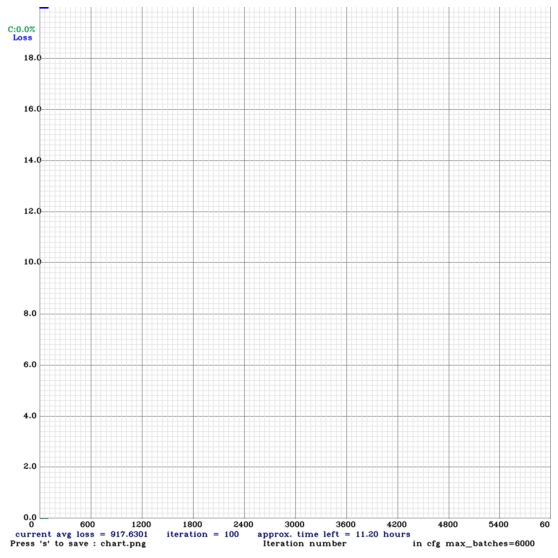

In [17]:
# chart of training steps
imShow('chart.png')

In [ ]:
# eğitime kaldığımız yerden ve istediğimiz ağırlıklarla devam edebiliriz.
!./darknet detector train data/obj.data /content/darknet/cfg/yolov3_custom.cfg /content/gdrive/MyDrive/yolov3_tutorial/training/yolov3_custom_last.weights -dont_show

In [18]:
# eğittiğimiz modeli test edelim ve doğruluk değerine bakalım
!./darknet detector map data/obj.data /content/darknet/cfg/yolov3_custom.cfg /content/gdrive/MyDrive/yolov3_tutorial/training/yolov3_custom_last.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [19]:
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# indirmek istediğimiz ağırlıkları drive üzerinden ya da buradan indirebiliriz
download('/content/gdrive/MyDrive/yolov3_tutorial/training/yolov3_custom_last.weights')
download('/content/darknet/cfg/yolov3_custom.cfg')